In [1]:
import os
import json
from utils import get_colors

In [2]:
# loading data

from sorbetto.core.entity import Entity
from sorbetto.performance.two_class_classification import TwoClassClassificationPerformance

PATH_DATA = os.path.join(os.getcwd(), 'data', 'semantic_segmentation_methods.json')

MAP_DATASETS = {
    'Cityscapes': '♠',
    'ADE20K': '♥',
    'Pascal VOC 2012': '♦',
    'COCO-Stuff 164k': '♣'
}

def read_json(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def read_data(filePath:str = PATH_DATA):
    data = read_json(filePath)

    processed_data = []

    colors = get_colors(len(data))

    # convert each instance into an Entity
    for i, elem in enumerate(data):
        performance = TwoClassClassificationPerformance(
            ptp=elem['proba_tp'],
            ptn=elem['proba_tn'],
            pfp=elem['proba_fp'],
            pfn=elem['proba_fn']
        )

        entity = Entity(
            performance= performance,
            name = f"{elem['model']} {MAP_DATASETS[elem['learning_set']]}",
            color= colors[i]
        )

        processed_data.append(entity)

    return processed_data



data = read_data()

In [3]:
from sorbetto.performance.finite_set_of_two_class_classification_performances import FiniteSetOfTwoClassClassificationPerformances

def entitiesList2perfs(entitiesList):
    perfs = [entity.performance for entity in entitiesList]
    return FiniteSetOfTwoClassClassificationPerformances(perfs)

perfs = entitiesList2perfs(data)

In [4]:
from sorbetto.analysis.analysis_method_designer import AnalysisForMethodDesigner
from sorbetto.parameterization.parameterization_default import ParameterizationDefault

parameterization = ParameterizationDefault()

method_ana = AnalysisForMethodDesigner(
    performance=perfs,
    competitors=None,
    parameterization=parameterization,
    resolution=1001,
)

Why competitors?


In [26]:
sota_tile = method_ana.getStateOfTheArtValueTile()
baseline_tile = method_ana.getBaselineValueTile()

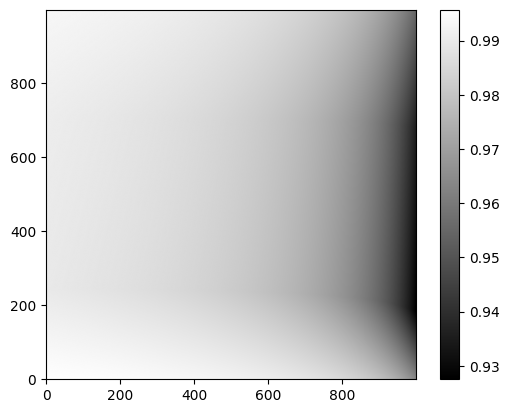

In [25]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 1000)
b = np.linspace(0, 1, 1000)

a2, b2 = np.meshgrid(a, b, indexing='xy')

res = sota_tile(a2, b2)

plt.imshow(res, origin='lower', cmap='gray')
plt.colorbar()
plt.show()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'SOTA Value Tile'}, xlabel='a(I)', ylabel='b(I)'>)

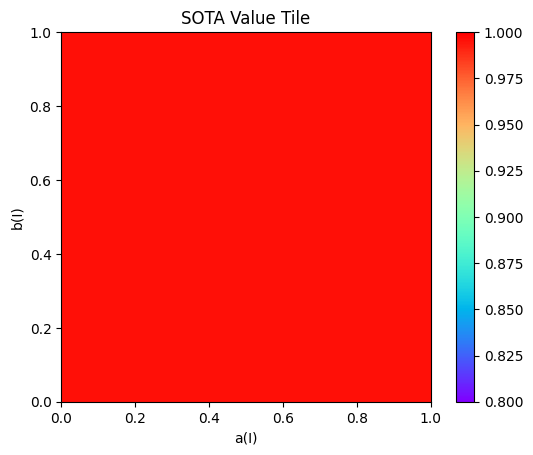

In [24]:
sota_tile.draw()

# need to dynamically adjust the colorbar

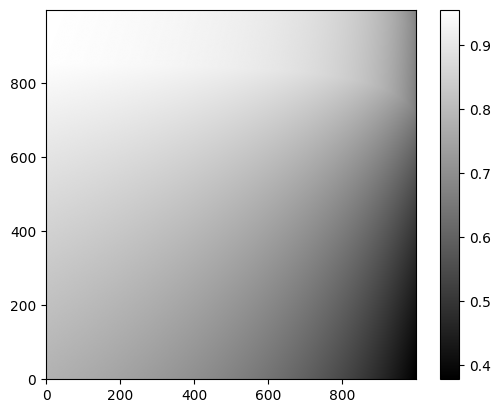

In [27]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 1000)
b = np.linspace(0, 1, 1000)

a2, b2 = np.meshgrid(a, b, indexing='xy')

res = baseline_tile(a2, b2)

plt.imshow(res, origin='lower', cmap='gray')
plt.colorbar()
plt.show()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Baseline Value Tile'}, xlabel='a(I)', ylabel='b(I)'>)

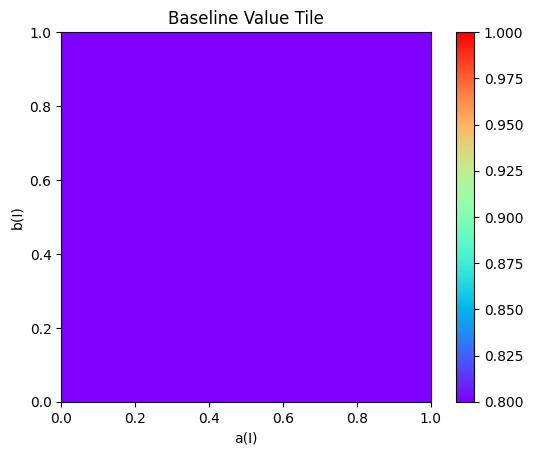

In [28]:
baseline_tile.draw()

In [5]:
from sorbetto.analysis.analysis_app_developer import AnalysisForAppDeveloper
from sorbetto.parameterization.parameterization_default import ParameterizationDefault

parameterization = ParameterizationDefault()

analysis_dev = AnalysisForAppDeveloper(
    entities=data,
    parameterization=parameterization
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Entity Tile for rank 0'}, xlabel='a(I)', ylabel='b(I)'>)

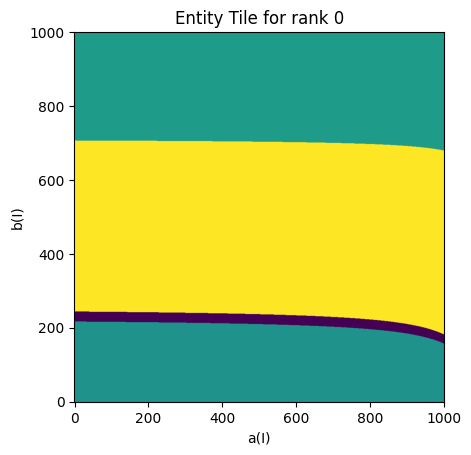

In [6]:
e_tile = analysis_dev.getEntityTile(0)
e_tile.draw()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Value Tile'}, xlabel='a(I)', ylabel='b(I)'>)

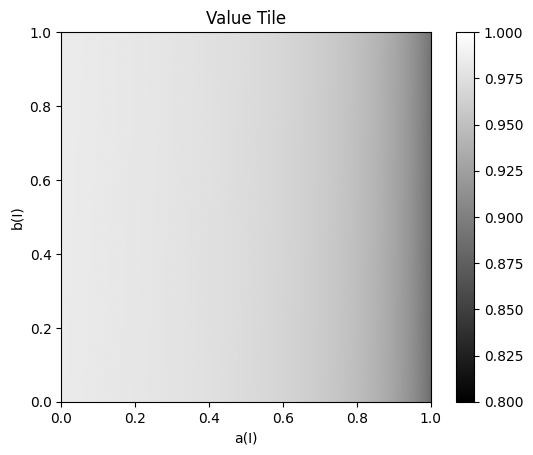

In [7]:
v_tile = analysis_dev.getValueTile(data[1])
v_tile.draw()